In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import pandas_profiling as pp 
import seaborn as sns
import matplotlib.pyplot as plt

# Credit EDA Case Study

We are provided with data of 307511 clients who have applied for loans in application_data excel sheet. We need to analyse and identify the applicants who will for sure repay the loans obtained and identify those, who have chance of defaulting. We need to make sure that applicants who will repay the loan are not rejected so that banks business is not hampered.

We are also provided with previous applications dataset of clients.

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


# Data Cleaning

In [3]:
df_app_current= pd.read_csv("C:\\Upgrad\\Credit EDA Case Study\\application_data.csv")

In [4]:
df_app_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Check the number of rows and columns in the dataframe
df_app_current.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe
df_app_current.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
len(df_app_current)

307511

In [8]:
inp = ((df_app_current.isnull().sum().sort_values(ascending=False)/len(df_app_current))*100)

In [9]:
inp[(inp>=45)==True]

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

From the above information we can see that there are few columns with null values columns. The columns are
AMT_ANNUITY
,AMT_GOODS_PRICE
,NAME_TYPE_SUITE
,OWN_CAR_AGE
,OCCUPATION_TYPE
,CNT_FAM_MEMBERS
,EXT_SOURCE_1
,EXT_SOURCE_2
,EXT_SOURCE_3
,APARTMENTS_AVG
,BASEMENTAREA_AVG
,YEARS_BEGINEXPLUATATION_AVG
,YEARS_BUILD_AVG
,COMMONAREA_AVG
,ELEVATORS_AVG
,ENTRANCES_AVG
,FLOORSMAX_AVG
,LANDAREA_AVG
,LIVINGAPARTMENTS_AVG
,LIVINGAREA_MODE
,LIVINGAPARTMENTS_MODE
,LIVINGAREA_MODE
,NONLIVINGAPARTMENTS_MODE
,LIVINGAREA_MEDI              
,NONLIVINGAPARTMENTS_MEDI      
,NONLIVINGAREA_MEDI            
,FONDKAPREMONT_MODE            
,HOUSETYPE_MODE                
,TOTALAREA_MODE                
,WALLSMATERIAL_MODE            
,EMERGENCYSTATE_MODE           
,OBS_30_CNT_SOCIAL_CIRCLE      
,DEF_30_CNT_SOCIAL_CIRCLE      
,OBS_60_CNT_SOCIAL_CIRCLE      
,DEF_60_CNT_SOCIAL_CIRCLE     
,DAYS_LAST_PHONE_CHANGE 
,AMT_REQ_CREDIT_BUREAU_HOUR
,AMT_REQ_CREDIT_BUREAU_DAY    
,AMT_REQ_CREDIT_BUREAU_WEEK    
,AMT_REQ_CREDIT_BUREAU_MON    
,AMT_REQ_CREDIT_BUREAU_QRT  
,AMT_REQ_CREDIT_BUREAU_YEAR 


Out of which we can drop the columns which are having more 45% null values from above line of code

In [10]:
# Dropping the columns which are having more than 45% null values,
df_app_current.drop(['COMMONAREA_MODE'                 
,'COMMONAREA_MEDI'                 
,'COMMONAREA_AVG'                 
,'NONLIVINGAPARTMENTS_AVG'         
,'NONLIVINGAPARTMENTS_MODE'        
,'NONLIVINGAPARTMENTS_MEDI'        
,'FONDKAPREMONT_MODE'              
,'LIVINGAPARTMENTS_AVG'            
,'LIVINGAPARTMENTS_MODE'           
,'LIVINGAPARTMENTS_MEDI'           
,'FLOORSMIN_AVG'                   
,'FLOORSMIN_MODE'                  
,'FLOORSMIN_MEDI'                  
,'YEARS_BUILD_MODE'                
,'YEARS_BUILD_MEDI'                
,'YEARS_BUILD_AVG'                 
,'LANDAREA_AVG'                    
,'LANDAREA_MEDI'                   
,'LANDAREA_MODE'                   
,'BASEMENTAREA_MEDI'               
,'BASEMENTAREA_MODE'               
,'BASEMENTAREA_AVG'                
,'EXT_SOURCE_1'                    
,'NONLIVINGAREA_MEDI'              
,'NONLIVINGAREA_MODE'              
,'NONLIVINGAREA_AVG'               
,'ELEVATORS_MODE'                  
,'ELEVATORS_MEDI'                  
,'ELEVATORS_AVG'                   
,'WALLSMATERIAL_MODE'              
,'APARTMENTS_MEDI'                 
,'APARTMENTS_AVG'                  
,'APARTMENTS_MODE'                 
,'ENTRANCES_MEDI'                  
,'ENTRANCES_AVG'                   
,'ENTRANCES_MODE'                  
,'LIVINGAREA_AVG'                  
,'LIVINGAREA_MODE'                 
,'LIVINGAREA_MEDI'                 
,'HOUSETYPE_MODE'                  
,'FLOORSMAX_AVG'                   
,'FLOORSMAX_MODE'                  
,'FLOORSMAX_MEDI'                  
,'YEARS_BEGINEXPLUATATION_AVG'     
,'YEARS_BEGINEXPLUATATION_MODE'    
,'YEARS_BEGINEXPLUATATION_MEDI'    
,'TOTALAREA_MODE'                  
,'EMERGENCYSTATE_MODE'
,'OWN_CAR_AGE'],axis=1,inplace=True)

In [11]:
df_app_current.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
# We can see that there are still columns with null values ,we can further analyse these columns 
# and check whether we can insert values in such columns

inp1 = ((df_app_current.isnull().sum().sort_values(ascending=False)/len(df_app_current))*100)

In [13]:
# Check for columns having null values less than 13%
inp1[((inp1<13)==True) & ((inp1!= 0)==True)]

NAME_TYPE_SUITE             0.420148
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [14]:
# Since the amount of data missing in the above columns are less than 1% , we can drop these rows.
df_app_current=df_app_current[~(df_app_current['NAME_TYPE_SUITE'].isnull())]
df_app_current=df_app_current[~(df_app_current['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())]
df_app_current=df_app_current[~(df_app_current['OBS_60_CNT_SOCIAL_CIRCLE'].isnull())]
df_app_current=df_app_current[~(df_app_current['DEF_60_CNT_SOCIAL_CIRCLE'].isnull())]
df_app_current=df_app_current[~(df_app_current['EXT_SOURCE_2'].isnull())]
df_app_current=df_app_current[~(df_app_current['AMT_GOODS_PRICE'].isnull())]
df_app_current=df_app_current[~(df_app_current['AMT_ANNUITY'].isnull())]
df_app_current=df_app_current[~(df_app_current['CNT_FAM_MEMBERS'].isnull())]
df_app_current=df_app_current[~(df_app_current['DAYS_LAST_PHONE_CHANGE'].isnull())]

In [15]:
df_app_current.shape

(304531, 73)

In [16]:
df_app_current.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

In [17]:
# There are few more columns which are having null values such as OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR   
#,AMT_REQ_CREDIT_BUREAU_DAY ,AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON
#, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

#Lets see by analysing what we can do to remove these nulls

In [18]:
inp3 = ((df_app_current.isnull().sum().sort_values(ascending=False)/len(df_app_current))*100)

In [19]:
inp3[inp3>0]

OCCUPATION_TYPE               31.338353
EXT_SOURCE_3                  19.784849
AMT_REQ_CREDIT_BUREAU_HOUR    13.498790
AMT_REQ_CREDIT_BUREAU_QRT     13.498790
AMT_REQ_CREDIT_BUREAU_YEAR    13.498790
AMT_REQ_CREDIT_BUREAU_DAY     13.498790
AMT_REQ_CREDIT_BUREAU_WEEK    13.498790
AMT_REQ_CREDIT_BUREAU_MON     13.498790
dtype: float64

In [20]:
#Analysing the AMT_REQ_CREDIT_BUREAU_HOUR and we can insert the value as 0
df_app_current.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    261818
1.0      1539
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [21]:
#Insert the value as Zero
df_app_current.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)

In [22]:
# From this column also we can understand ,
df_app_current.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      213175
1.0       33681
2.0       14289
3.0        1701
4.0         472
5.0          63
6.0          27
7.0           7
8.0           6
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [23]:
df_app_current.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     70598
1.0     62878
2.0     49851
3.0     33417
4.0     20586
5.0     11984
6.0      6920
7.0      3844
8.0      2119
9.0      1087
11.0       30
12.0       29
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [24]:
# Zero is acceptable value which can be inserted hence we will insert in all the other columns as well
df_app_current.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)
df_app_current.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)
df_app_current.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0,inplace=True)
df_app_current.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)
df_app_current.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)

In [25]:
# Checking the distinct values in Occupation_type and since there 30 percent values are missing we can fill the 
# it with 'Unknown' variable
df_app_current.OCCUPATION_TYPE.value_counts()

Laborers                 54730
Sales staff              31790
Core staff               27263
Managers                 21114
Drivers                  18456
High skill tech staff    11261
Accountants               9698
Medicine staff            8459
Security staff            6667
Cooking staff             5898
Cleaning staff            4615
Private service staff     2629
Low-skill Laborers        2077
Waiters/barmen staff      1335
Secretaries               1293
Realty agents              742
HR staff                   558
IT staff                   511
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
df_app_current.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [27]:
# And for the EXT_SOURCE_3 value we can insert mean of this column
df_app_current.EXT_SOURCE_3.mean()

0.5107644199098772

In [28]:
df_app_current.EXT_SOURCE_3.fillna('0.5107',inplace=True)

In [29]:
df_app_current.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

#After correcting null data in dataframe , we will check if there are any columns with incorrect datatypes.
#And with careful analysis we can see that there are few columns which should be int but instead as of float type.
#Columns are :
  - DAYS_REGISTRATION
  - CNT_FAM_MEMBERS
  - DAYS_LAST_PHONE_CHANGE
  - AMT_REQ_CREDIT_BUREAU_HOUR
  - AMT_REQ_CREDIT_BUREAU_DAY
  - AMT_REQ_CREDIT_BUREAU_WEEK
  - AMT_REQ_CREDIT_BUREAU_MON
  - AMT_REQ_CREDIT_BUREAU_QRT
  - AMT_REQ_CREDIT_BUREAU_YEAR
  - OBS_30_CNT_SOCIAL_CIRCLE 
  - DEF_30_CNT_SOCIAL_CIRCLE     
  - OBS_60_CNT_SOCIAL_CIRCLE     
  - DEF_60_CNT_SOCIAL_CIRCLE
           


#Also there are few columns for which datatype should be converted from object to float
  - EXT_SOURCE_3

In [30]:
# Correcting the data type of Days_Registration field
df_app_current['DAYS_REGISTRATION'] = df_app_current['DAYS_REGISTRATION'].astype('int')

In [31]:
# Correcting the data type of CNT_FAM_MEMBERS field
df_app_current['CNT_FAM_MEMBERS'] = df_app_current['CNT_FAM_MEMBERS'].astype('int')

In [32]:
# Correcting the data type of AMT_REQ_CREDIT_BUREAU_HOUR field
df_app_current['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app_current['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')

# Correcting the data type of AMT_REQ_CREDIT_BUREAU_DAY field
df_app_current['AMT_REQ_CREDIT_BUREAU_DAY'] = df_app_current['AMT_REQ_CREDIT_BUREAU_DAY'].astype('int')

# Correcting the data type of AMT_REQ_CREDIT_BUREAU_DAY field
df_app_current['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app_current['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('int')

# Correcting the data type of AMT_REQ_CREDIT_BUREAU_MON field
df_app_current['AMT_REQ_CREDIT_BUREAU_MON'] = df_app_current['AMT_REQ_CREDIT_BUREAU_MON'].astype('int')

# Correcting the data type of AMT_REQ_CREDIT_BUREAU_QRT field
df_app_current['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app_current['AMT_REQ_CREDIT_BUREAU_QRT'].astype('int')

# Correcting the data type of AMT_REQ_CREDIT_BUREAU_YEAR field
df_app_current['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app_current['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('int')

In [33]:
# Column DAYS_LAST_PHONE_CHANGE is having negative values , we will correct the value to postive then convert the
# data type 
df_app_current['DAYS_LAST_PHONE_CHANGE'] = df_app_current['DAYS_LAST_PHONE_CHANGE'].abs()

df_app_current['DAYS_LAST_PHONE_CHANGE'] = df_app_current['DAYS_LAST_PHONE_CHANGE'].astype('int')

In [34]:
# Correcting the data type of OBS_30_CNT_SOCIAL_CIRCLE field
df_app_current['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app_current['OBS_30_CNT_SOCIAL_CIRCLE'].astype('int')

# Correcting the data type of DEF_30_CNT_SOCIAL_CIRCLE field
df_app_current['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app_current['DEF_30_CNT_SOCIAL_CIRCLE'].astype('int')

# Correcting the data type of OBS_60_CNT_SOCIAL_CIRCLE field
df_app_current['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app_current['OBS_60_CNT_SOCIAL_CIRCLE'].astype('int')

# Correcting the data type of DEF_60_CNT_SOCIAL_CIRCLE field
df_app_current['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app_current['DEF_60_CNT_SOCIAL_CIRCLE'].astype('int')

In [35]:
# Correcting the data type of EXT_SOURCE_3 field

df_app_current['EXT_SOURCE_3'] = df_app_current['EXT_SOURCE_3'].astype('float')

In [36]:
# There are few more columns which are marked as negative
df_app_current['DAYS_BIRTH'] = df_app_current['DAYS_BIRTH'].abs()
df_app_current['DAYS_EMPLOYED'] = df_app_current['DAYS_EMPLOYED'].abs()
df_app_current['DAYS_REGISTRATION'] = df_app_current['DAYS_REGISTRATION'].abs()
df_app_current['DAYS_ID_PUBLISH'] = df_app_current['DAYS_ID_PUBLISH'].abs()

In [ ]:
# Deleting NA varibales from code gender
df_app_current=df_app_current[~(df_app_current.CODE_GENDER=='XNA')]

In [179]:
# Deleting NA varibales from Organization
df_app_current=df_app_current[~(df_app_current.ORGANIZATION_TYPE=='XNA')]

In [37]:
df_app_current.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

# Binning of the columns

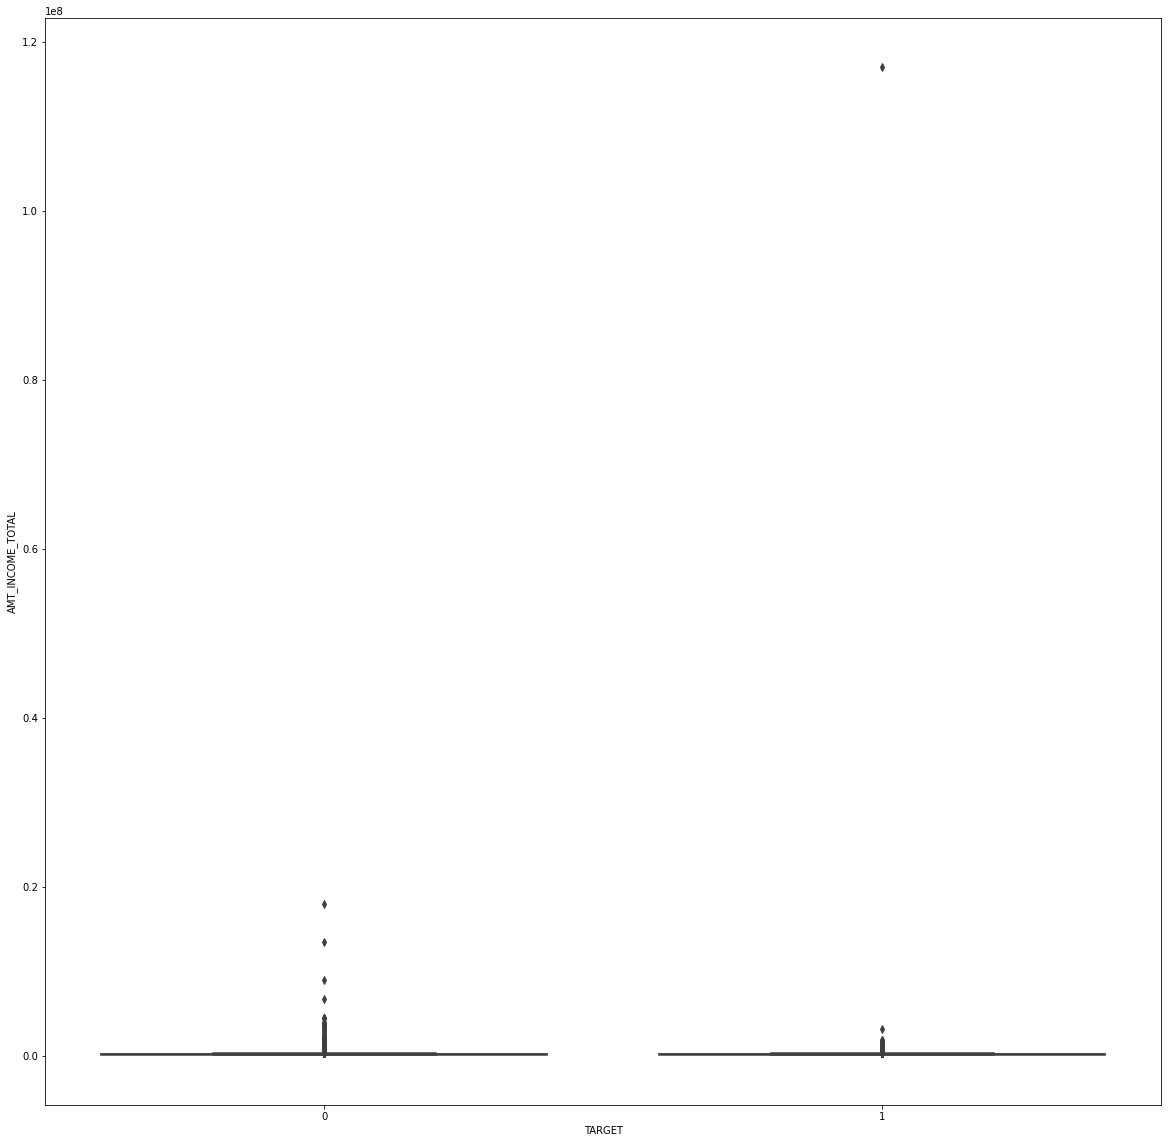

In [38]:
# Lets bin the varibles of income_total by categorizing
#Lets see if there are any outliers are present in it
plt.figure(figsize=(20,20))
sns.boxplot(df_app_current.TARGET,df_app_current.AMT_INCOME_TOTAL)
plt.show()

From the above box plot we can see that there are few outliers in income_total by client. We can remove few inorder to get a better picture of the graph

In [73]:
df_app_current = df_app_current[df_app_current.AMT_INCOME_TOTAL<1000000.0]

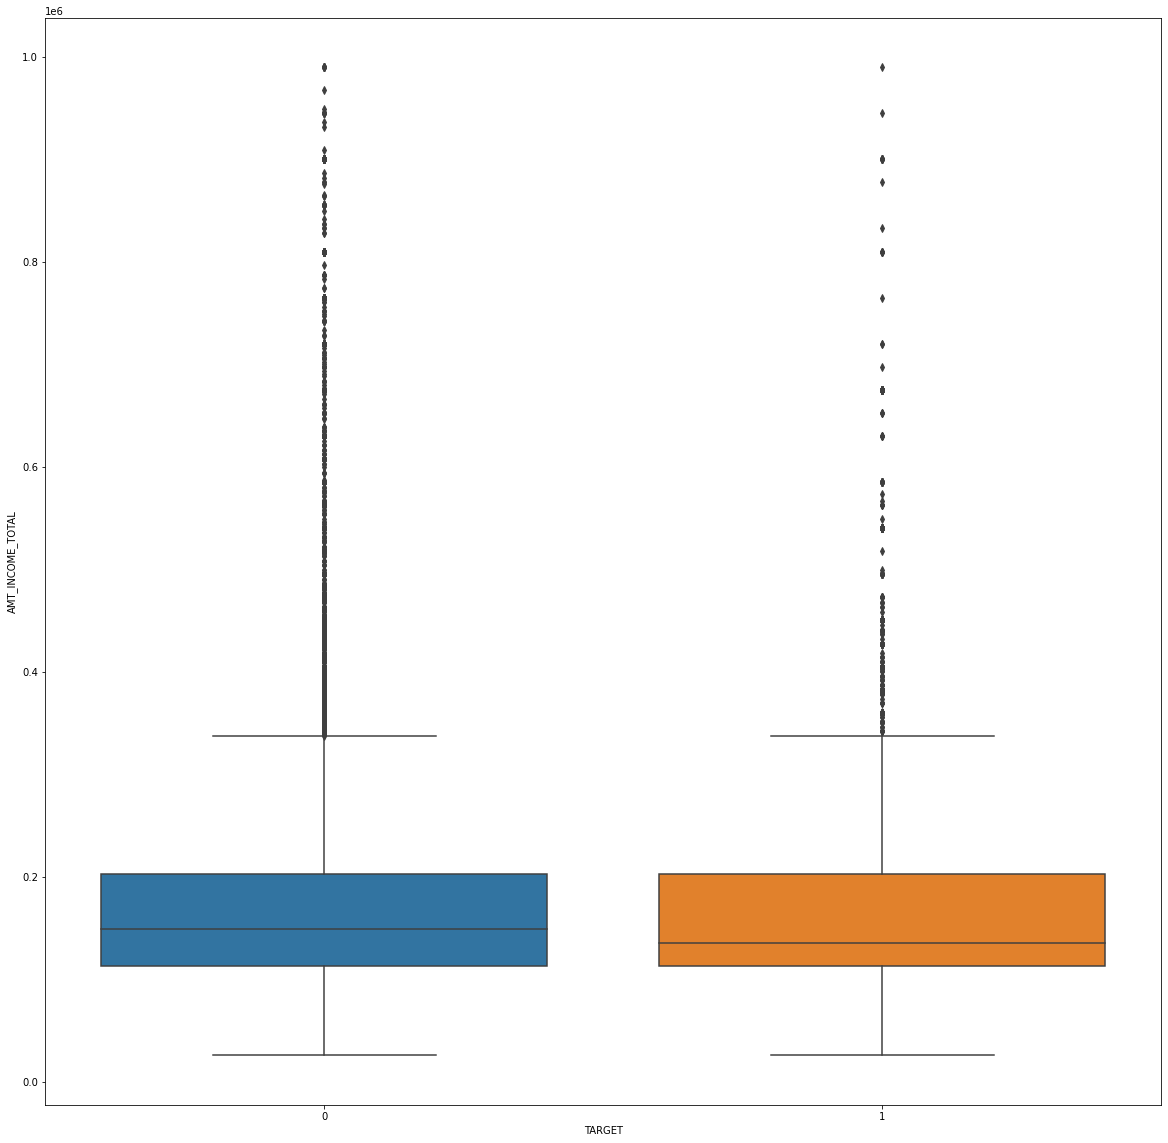

In [74]:
plt.figure(figsize=(20,20))
sns.boxplot(df_app_current.TARGET,df_app_current.AMT_INCOME_TOTAL)
plt.show()

From the above graph we can see the 50th percentile of income of  defaulters  are less than non-defaulters even though 25th and 75th percentile are same.

In [159]:
# Binning DAY_Birth into age groups
def age_group(val):
    if (val/360)<20:
        return '<20'
    elif (val/360)>=20 and (val/360)<35:
        return '20-35'
    elif (val/360)>=35 and (val/360)<50:
        return '35-50'
    else:
        return '>50'

In [160]:
df_app_current['AGE_GROUP'] = df_app_current.DAYS_BIRTH.apply(age_group)

In [183]:
# Binning AMT_CREDIT into credit groups
def amt_group(val):
    if (val)<1000000:
        return '0-10L'
    elif (val)>=1000000 and (val)<2000000:
        return '10-20L'
    elif (val)>=2000000 and (val)<3000000:
        return '20-30L'
    else:
        return '>30L'

In [184]:
df_app_current['CREDIT_GROUP'] = df_app_current.AMT_CREDIT.apply(amt_group)

In [192]:
df_app_current.AMT_INCOME_TOTAL.min()

25650.0

In [204]:
# Binning INCOME_TOTAL into Income groups
def income_group(val):
    if (val)<100000:
        return '0-1L'
    elif (val)>=100000 and (val)<500000:
        return '1-5L'
    elif (val)>=500000 and (val)<1000000:
        return '5-10L'
    elif (val)>=1500000 and (val)<2500000:
        return '15-25L'
    elif (val)>=2500000 and (val)<3500000:
        return '25-35L'
    elif (val)>=3500000 and (val)<4500000:
        return '35-45L'
    elif (val)>=4500000 and (val)<5500000:
        return '45-55L'
    else:
        return '>55L'

In [205]:
df_app_current['INCOME_GROUP'] = df_app_current.AMT_INCOME_TOTAL.apply(income_group)

In [78]:
# Lets see what all are different education levels are present in our clients
df_app_current.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    216513
Higher education                  73651
Incomplete higher                 10169
Lower secondary                    3788
Academic degree                     163
Name: NAME_EDUCATION_TYPE, dtype: int64

From the above we can see that there are four types of education type and this can be used as categorical data

In [46]:
# Lets see what all are different genders are present in our clients
df_app_current.CODE_GENDER.value_counts()

F      200480
M      104043
XNA         4
Name: CODE_GENDER, dtype: int64

In [48]:
# Lets see what all are different NAME_INCOME_TYPE are present in our clients
df_app_current.NAME_INCOME_TYPE.value_counts()

Working                 157336
Commercial associate     70791
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [49]:
# Lets see what all are different NAME_INCOME_TYPE are present in our clients
df_app_current.NAME_FAMILY_STATUS.value_counts()

Married                 194654
Single / not married     44876
Civil marriage           29480
Separated                19588
Widow                    15925
Name: NAME_FAMILY_STATUS, dtype: int64

In [50]:
# From the above data we are going to select the columns TARGET , CODE_GENDER , AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE
#,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,ORGANIZATION_TYPE for further analysis.

The TARGET column is main column which gives us the information whether client is paying the loan on time or is a defaulter.Apart from that we will consider the below datas

- Continous variables
   -AMT_INCOME_TOTAL ,
   -AMT_CREDIT
   
- Categorical Varibales
   -CODE_GENDER ,
   -NAME_INCOME_TYPE ,
   -NAME_EDUCATION_TYPE ,
   -NAME_FAMILY_STATUS

In [206]:
# Splitting the dataframe into Two : df_app_yes will be having people who will have TArget value as 1 and 
# df_app_no will have have targets with value as 0
df_app_yes = df_app_current[df_app_current['TARGET']==1]

In [207]:
df_app_no = df_app_current[df_app_current['TARGET']==0]

# Univariate Analysis

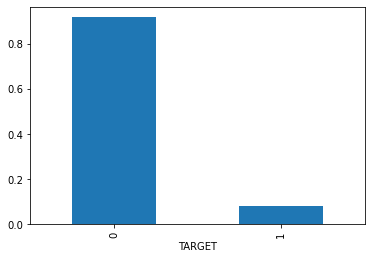

In [89]:
df_app_current.TARGET.value_counts(normalize=True).plot.bar()
plt.xlabel("TARGET")
plt.show()

From the above bar graph we can conclude the count of defaulters(Target=1) in the dataset is very less compared to count of non-defaulters

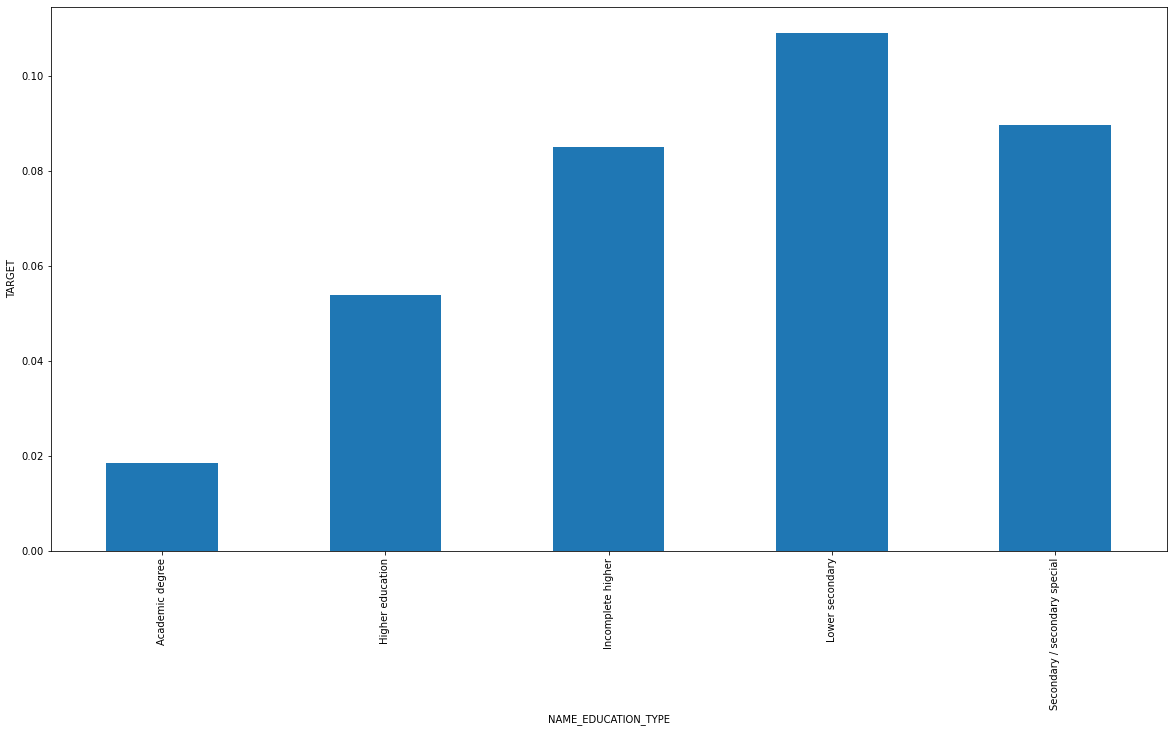

In [121]:
plt.figure(figsize=(20,10))
df_app_current.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

Inferences from the above Graphs are:

    1. We could see Lower Secondary people have more chance of defaulting
    2. And also people with education level of academic degree have a lower chance of defaulting
    3. To minimise the risks we can reduce the loan approvals on people with Secondary Education
    4. To maximise the profit we can aim more on people with academic degree

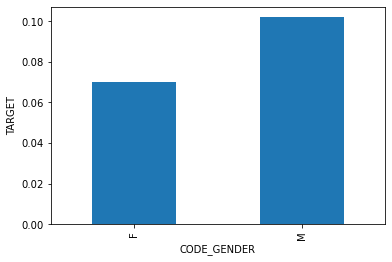

In [124]:
# Verify Gender against Target variable
df_app_current.groupby("CODE_GENDER")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

From the above graph we could conclude both men and women take loan, but in case of men default rates are more. 
A further analysis can be seen in below graph,

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

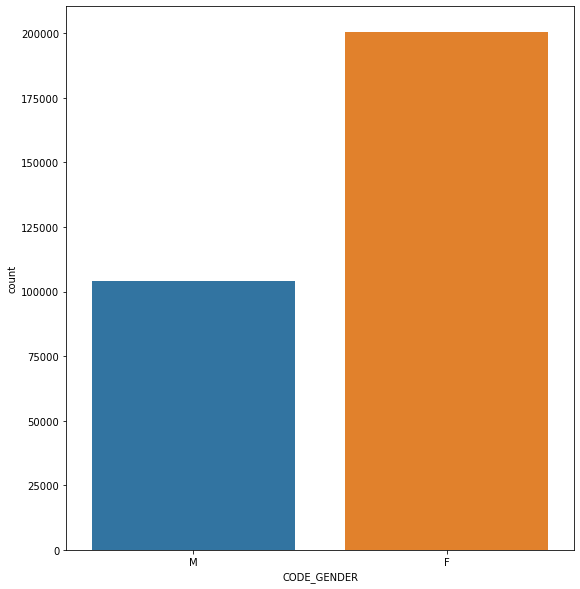

In [132]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
#plt.title('Defaulter')
sns.countplot('CODE_GENDER',data=df_app_current)

We can conclude from the above graph that even with count of females more , and their default rates is less compared to male gender.
Hence it will be more safer for banks to provide loan to female gender than male gender.

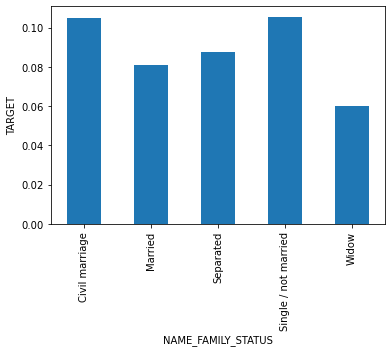

In [188]:
# Now lets compare data between family status and Target
df_app_current.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

From the above plt we can see that married people have less defaulters where as single\unmarried people have more default rates.

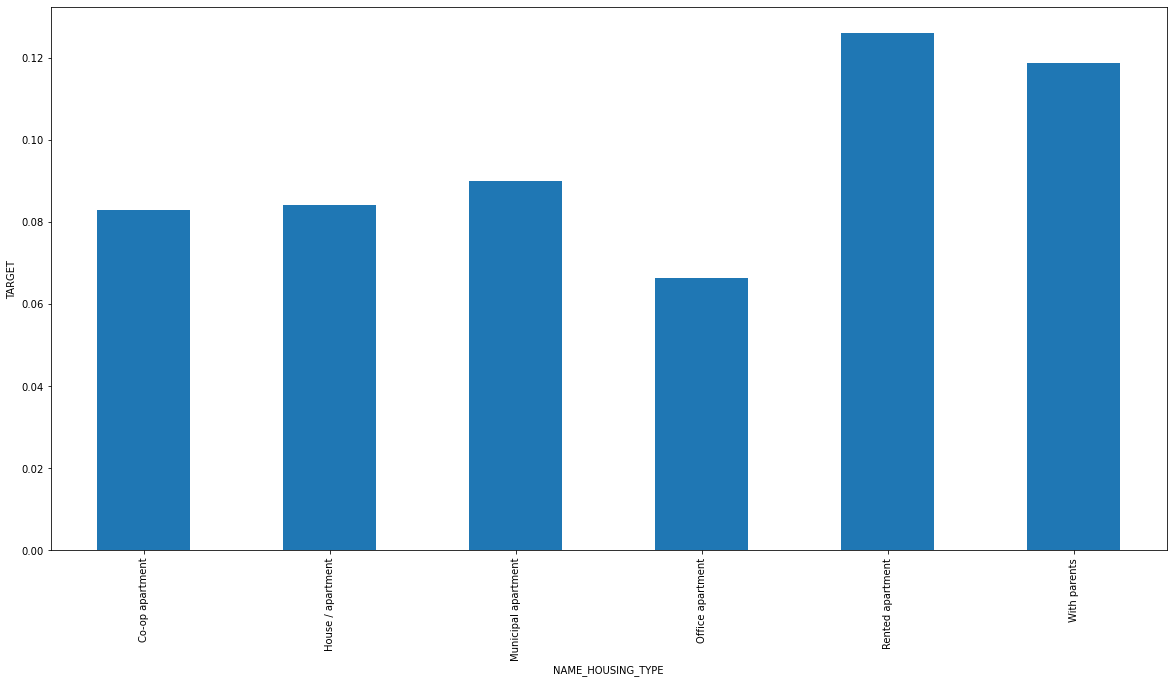

In [190]:
plt.figure(figsize=(20,10))
df_app_current.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

Inference from above graphs:

     1. We could see people living in rented apartments have higher defaulters. These set of people should be given loan after well background check
     
     2. People living in office apartments have lowest default rates

<Figure size 1440x1440 with 0 Axes>

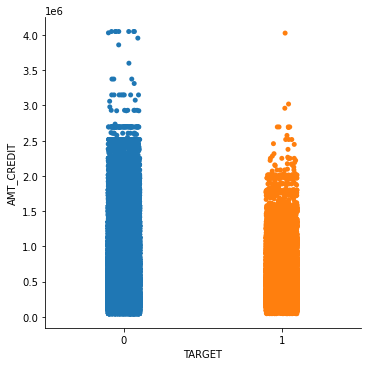

In [154]:
# AMT_CREDIT Vs TARGET
plt.figure(figsize=(20,20))
sns.catplot(x="TARGET", y="AMT_CREDIT", data=df_app_current)
plt.show()

From the above graph we could see that credit amount available for defaulters and non-defaulters lying  between 5,00,000 and 18,00,000 as the density of graph is more in this region. Also for deafulters there is value an outlier at 40,00,000.Lets try analysing the above graph in another way.

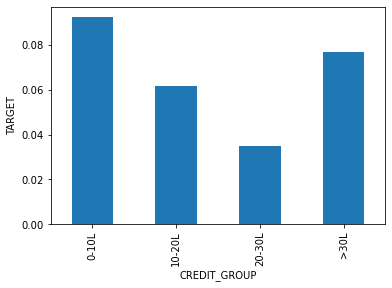

In [185]:
df_app_current.groupby("CREDIT_GROUP")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

From the above plot it is clearly visible that for an amount less than 10L , the chances of defaulting are more, whereas the range 20-30 has a very less default rate.
So we can increase more profit by promoting the credit group 20-30L

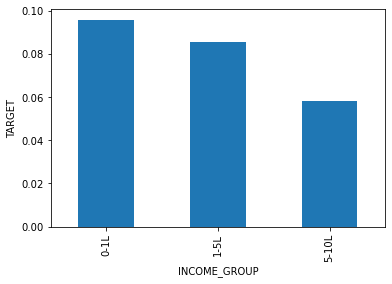

In [208]:
df_app_current.groupby("INCOME_GROUP")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

From the above plot it is clearly visible that people with  salary range 0- 1L have default rates more.
In order to reduce risks , we should do more background verification on such clients before approving the loan.

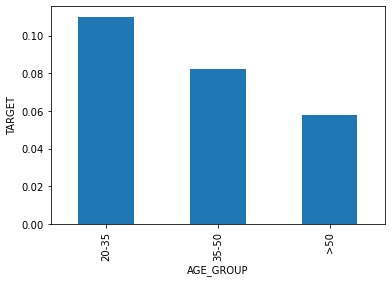

In [164]:
df_app_current.groupby("AGE_GROUP")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

From the above graph we cn conclude below:

    1.The people in age group 20-35 are more defaulters
    2.With increase in age, default rate is decreasing , hence older the person he is more responsible and trust worthy in repaying of loans

# Bivariate Analysis

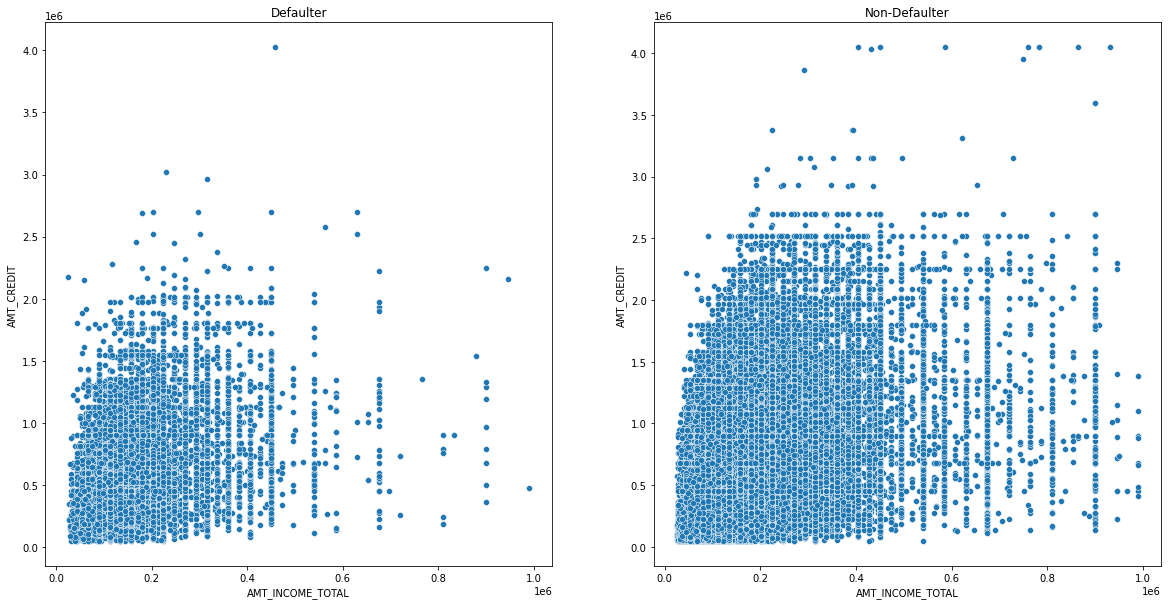

In [169]:
# Plot graph between Income Total and Credit amount

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.scatterplot(df_app_yes.AMT_INCOME_TOTAL,df_app_yes.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.scatterplot(df_app_no.AMT_INCOME_TOTAL,df_app_no.AMT_CREDIT)
plt.show()

Inference from above graphs are :

  1.In case of defaulter , with increase in income total the credit amount provided by bank also increases.The plot has thicker density at the initial stages suggesting most of income class is present in that range.

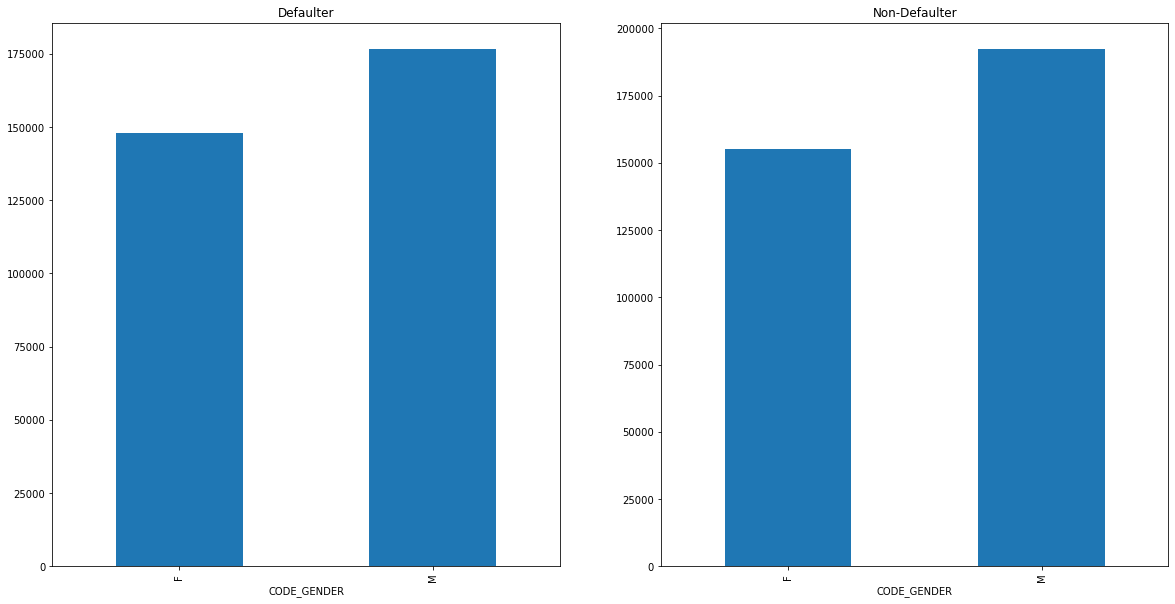

In [170]:
# Plot graph between Gender and Income 

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_app_yes.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_app_no.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()

If we could correlate the graph which was created during univariate analysis(gender vs Target ) and above graph , we can see that even though average of income obtained by females are less the default rate are minimum in that gender.

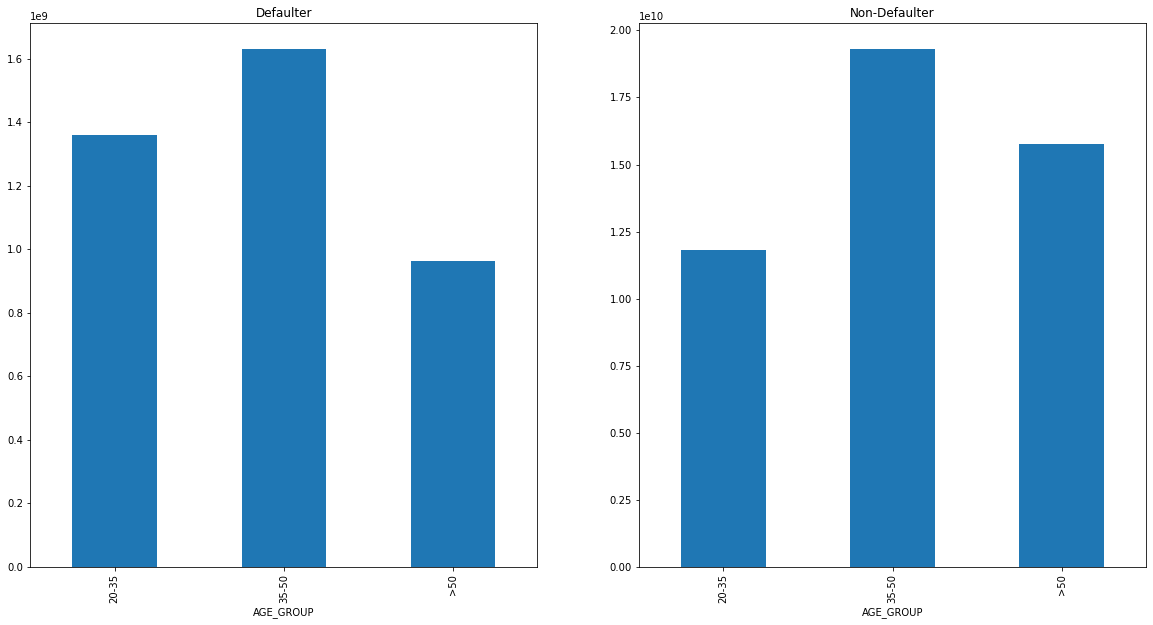

In [172]:
# Plot graph between Age group and Income 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Defaulter')
df_app_yes.groupby("AGE_GROUP")["AMT_INCOME_TOTAL"].sum().plot.bar()
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
df_app_no.groupby("AGE_GROUP")["AMT_INCOME_TOTAL"].sum().plot.bar()
plt.show()

From the above graph and univariate graph which was plotted(AGE_GROUP vs TARGET) , when we analyse the age group (20-35) between defaulter and non-defaulter , the income level obtained by defaulters are more plus more default rates. This gives proper inference to the us to reduce lending loans to this age group even if they have more income which in turn can reduce the risk of loss.

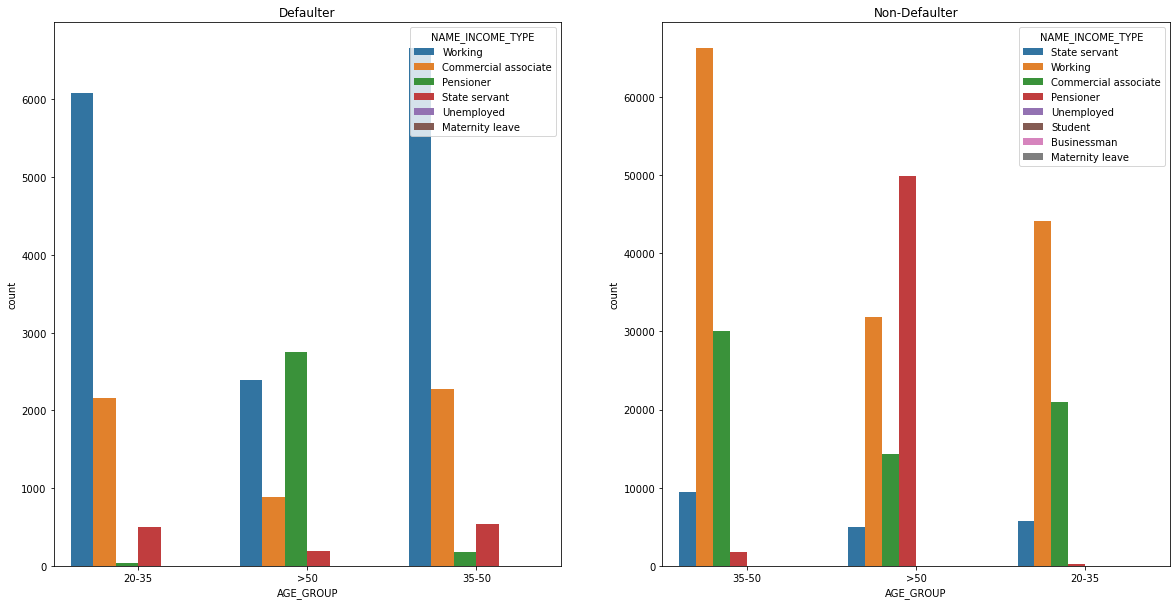

In [176]:
# Plot graph between Age group and Income Type
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Defaulter')
sns.countplot('AGE_GROUP',hue='NAME_INCOME_TYPE',data=df_app_yes)
plt.subplot(1,2,2)
plt.title('Non-Defaulter')
sns.countplot('AGE_GROUP',hue='NAME_INCOME_TYPE',data=df_app_no)
plt.show()

The more we analyse the age group , it strengthens our inference made from  the last graph

In [250]:
# From the above analysis we can conclude below key factors for the reducing risk of loan deafulting:
#  1.NAME_EDUCATION_TYPE
#  2.CODE_GENDER
#  3.AMT_INCOME_TOTAL
#  4.DAYS_BIRTH
#  5.AMT_CREDIT
#  6.NAME_HOUSING_TYPE

# Correlation matrix

In [57]:
corryes = df_app_yes.corr()

In [58]:
#Top 10 Correlation values for Target =1
corryes.unstack().sort_values(ascending=False).drop_duplicates().head(10)

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998286
AMT_GOODS_PRICE             AMT_CREDIT                     0.983065
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956477
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.885554
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.869760
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847260
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.778107
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752206
AMT_CREDIT                  AMT_ANNUITY                    0.751400
dtype: float64

<AxesSubplot:>

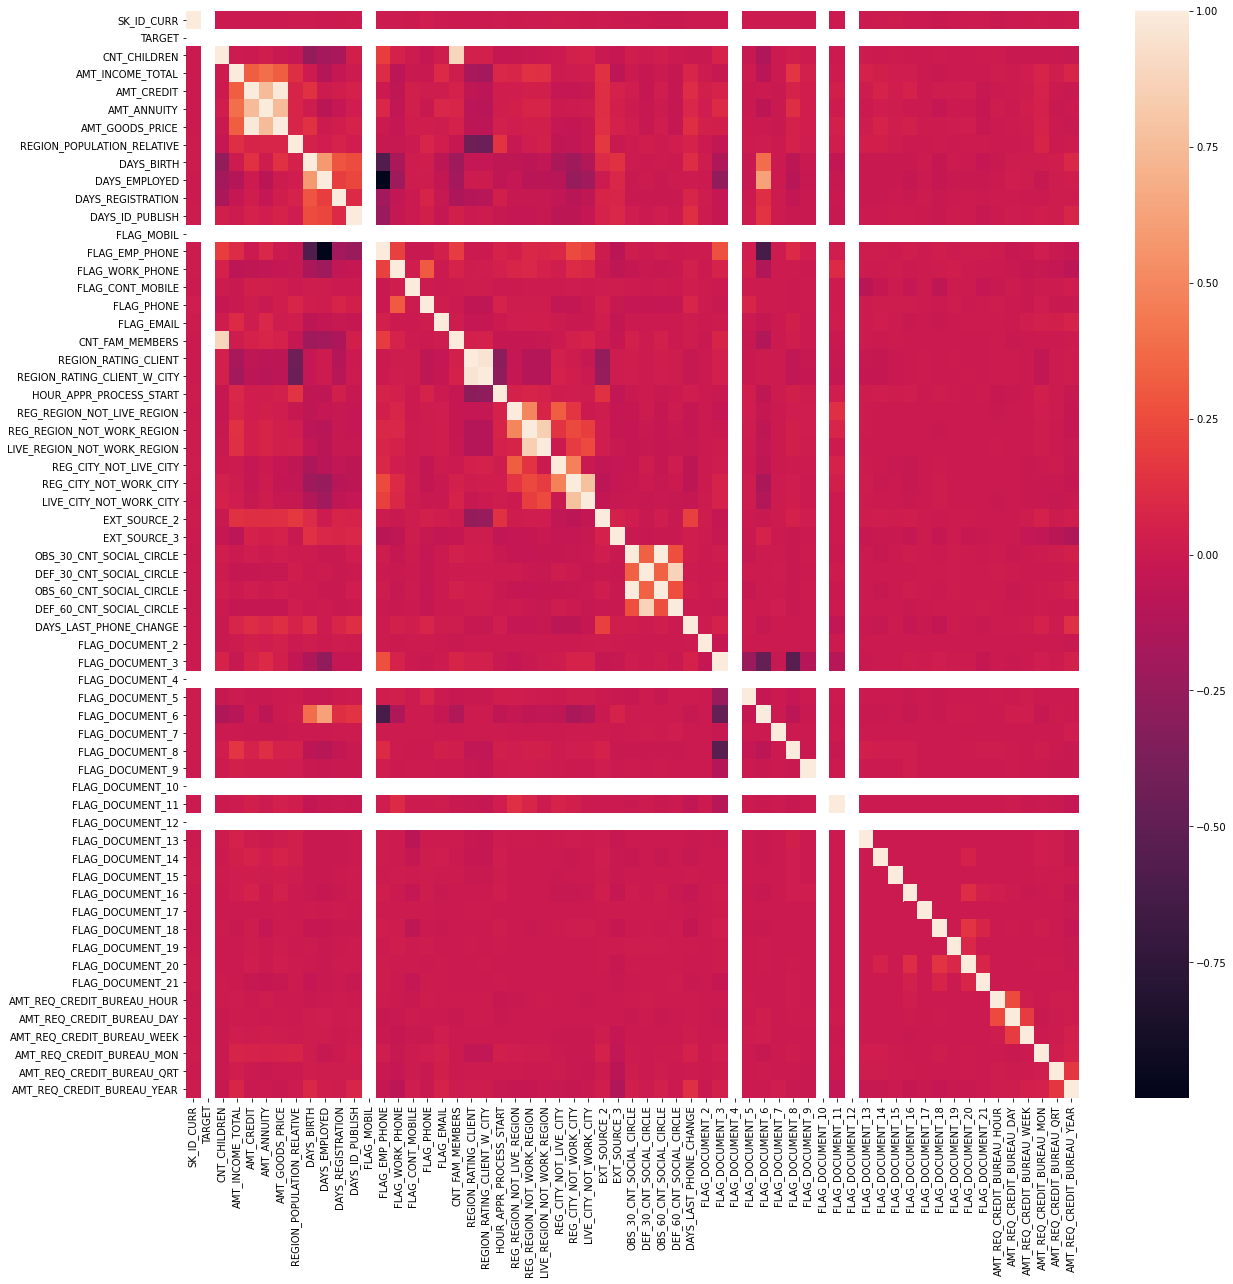

In [213]:
plt.figure(figsize=(20,20))
sns.heatmap(corryes)

In [59]:
corrno = df_app_no.corr()

In [216]:
#Top 10 Correlation values for Target =0
corrno.unstack().sort_values(ascending=False).drop_duplicates().head(10)

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998513
AMT_CREDIT                   AMT_GOODS_PRICE                0.987263
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949904
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878678
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861303
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859415
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830487
AMT_ANNUITY                  AMT_GOODS_PRICE                0.775888
                             AMT_CREDIT                     0.770437
dtype: float64

<AxesSubplot:>

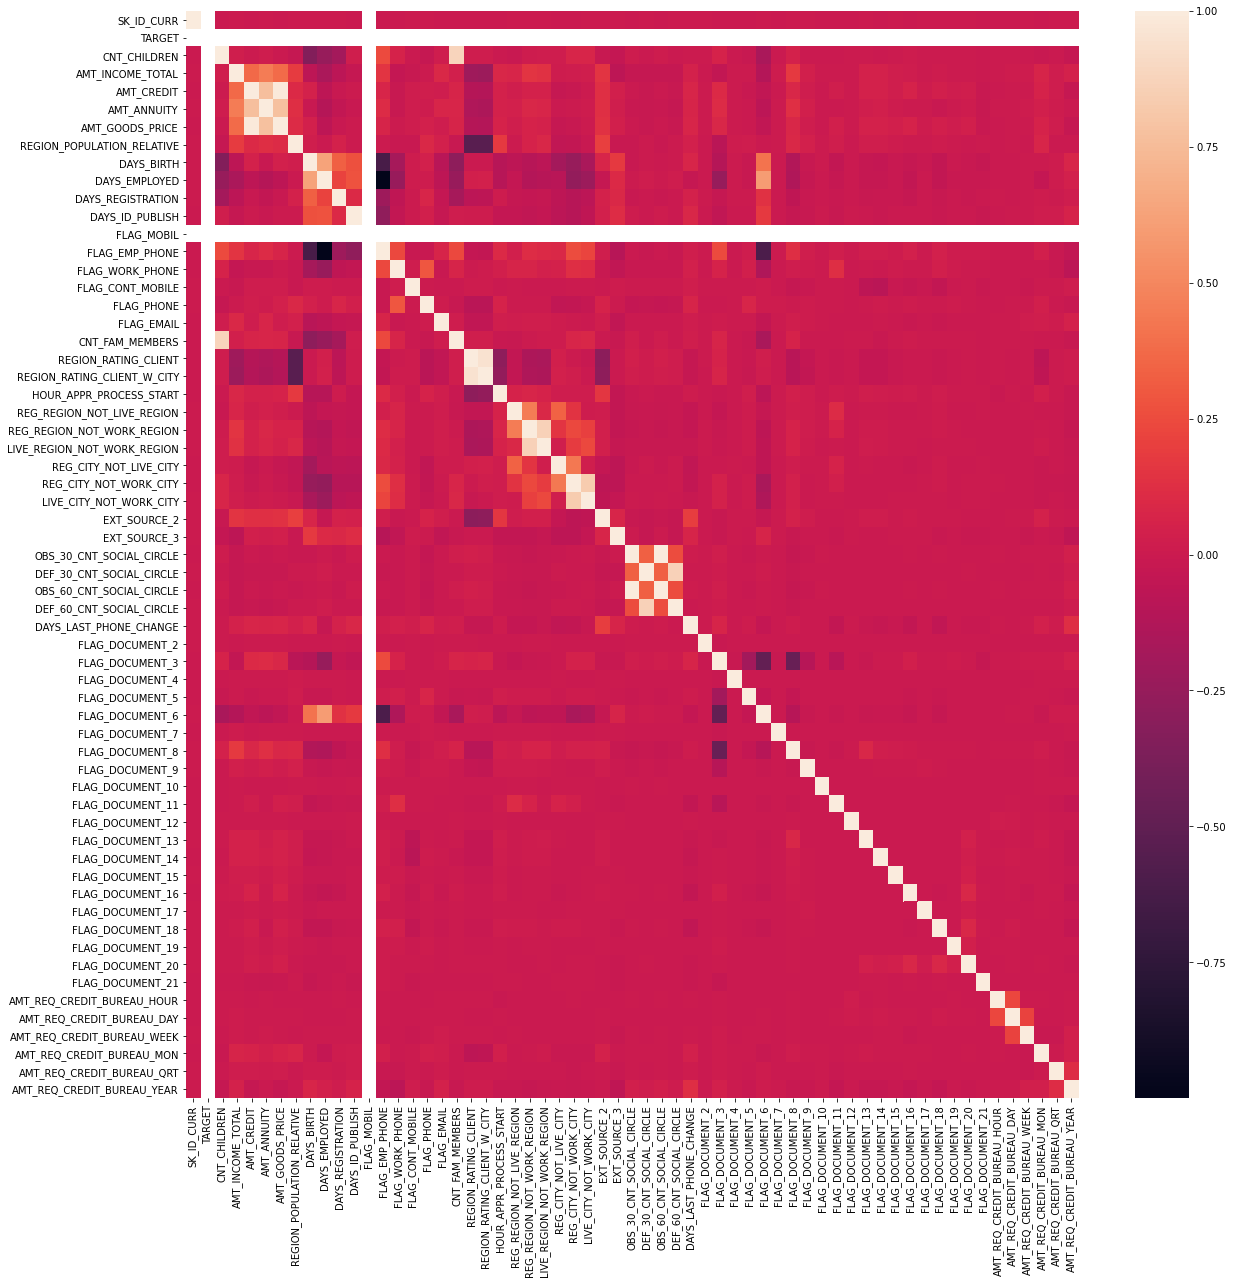

In [211]:
plt.figure(figsize=(20,20))
sns.heatmap(corrno)

# Lets merge the previous data with current application data for more analysis

In [217]:
df_app_prev = pd.read_csv("C:\\Upgrad\\Credit EDA Case Study\\previous_application.csv")

In [218]:
df_app_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
# Check the shape of dataframe
df_app_prev.shape

(1670214, 37)

In [220]:
#check the info of dataframe
df_app_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [221]:
# Data cleaning of new dataframe
inp4 = ((df_app_prev.isnull().sum().sort_values(ascending=False)/len(df_app_prev))*100)

In [222]:
inp4[inp4>45]

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
RATE_DOWN_PAYMENT           53.636480
AMT_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE             49.119754
dtype: float64

In [225]:
#Dropping the columns with more than 45% null values
df_app_prev.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE']
                 ,axis=1,inplace=True)

In [234]:
# Merging old and new dataset to gain more insights
df_new = pd.merge(df_app_current, df_app_prev, on = "SK_ID_CURR", how = "inner") 

In [237]:
#Remove the XAP or XNA values from the loan purpose column
df_new= df_new[~(df_new.NAME_CASH_LOAN_PURPOSE=='XAP')]

In [238]:
df_new= df_new[~(df_new.NAME_CASH_LOAN_PURPOSE=='XNA')]

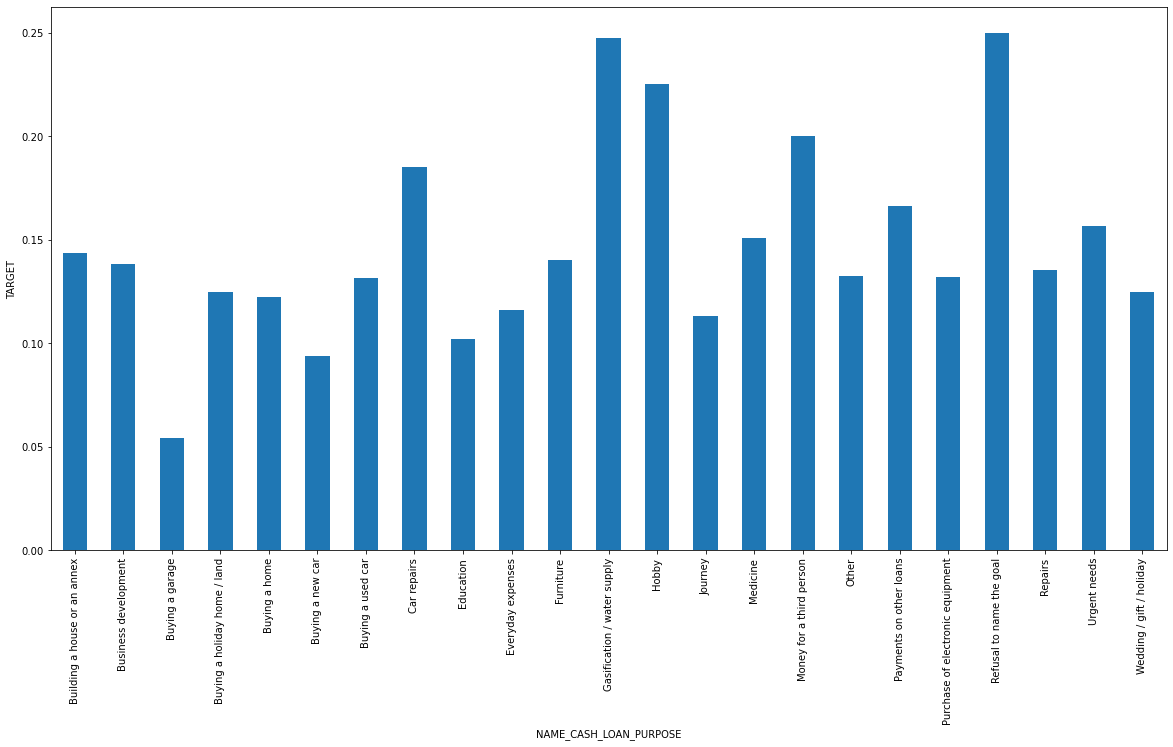

In [240]:
plt.figure(figsize=(20,10))
df_new.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

Inference from the above plot:

    1.The default rates are clearly high for people who are in group "Refusal to name the goal' or 'Gas apply' or 'Hobby'
    2.To reduce the risks , we should make it strict the person approaching loan to should state purpose and should have credible documents to support it.
    3. To maximise the profit, we can concentrate more on providing loan to people who buy garages.

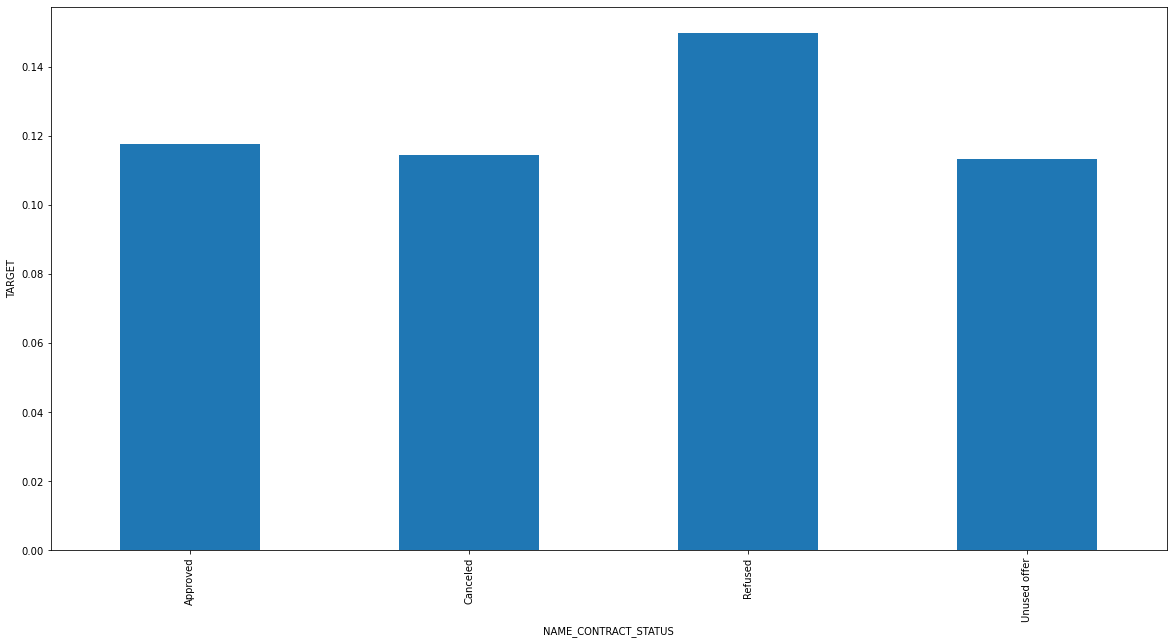

In [241]:
plt.figure(figsize=(20,10))
df_new.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.bar()
plt.ylabel("TARGET")
plt.show()

The plot clearly indicates the Refused loans have more default rates.

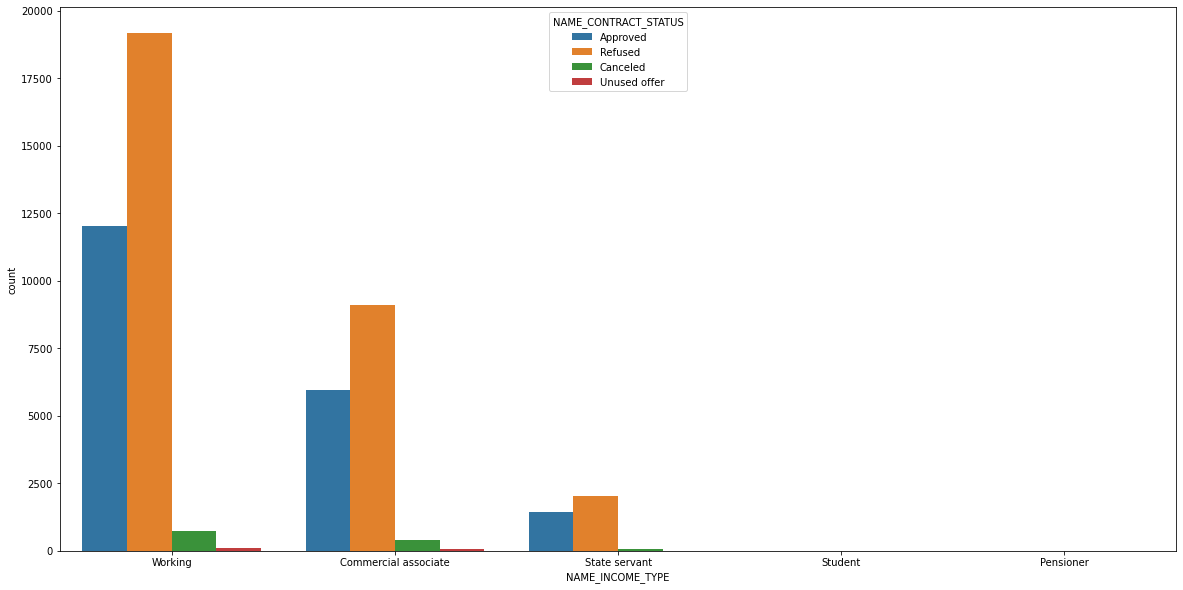

In [242]:
# Plot graph between Income type group and Contract Status
plt.figure(figsize=(20,10))
sns.countplot('NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',data=df_new)
plt.show()

The Working class people have more refusal count in contracts

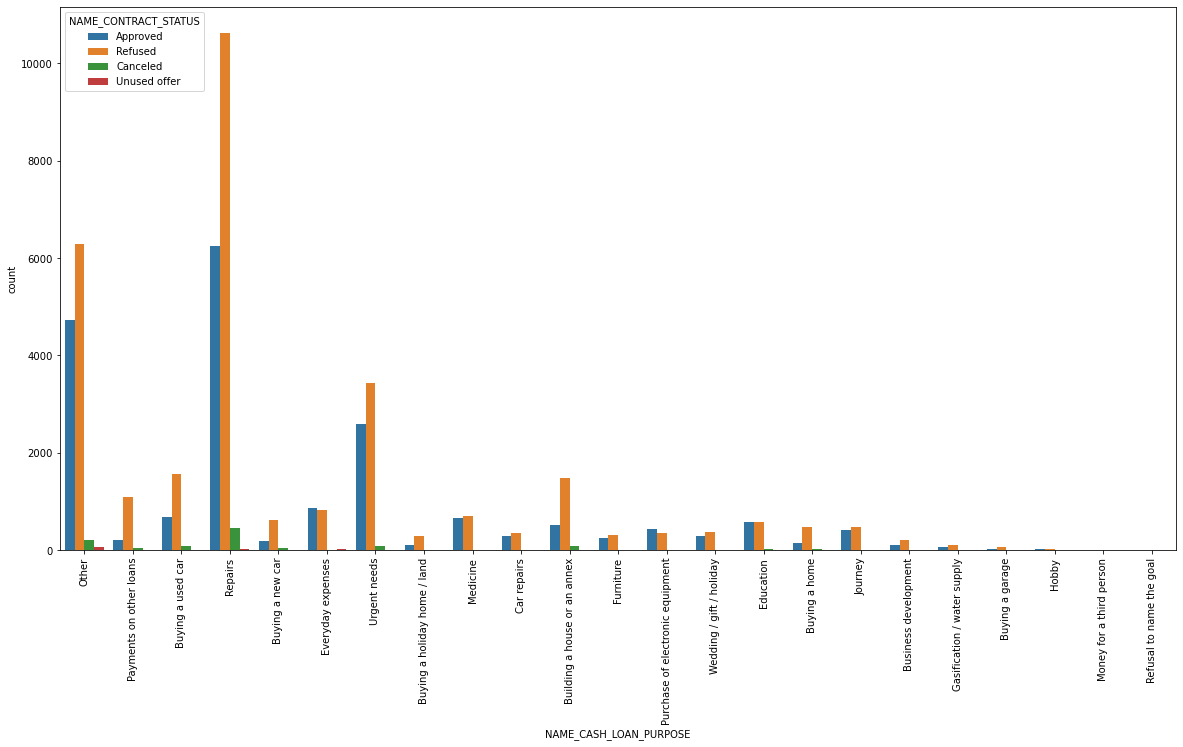

In [248]:
# Plot graph between education  type group and Contract Status
plt.figure(figsize=(20,10))
sns.countplot('NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',data=df_new)
plt.xticks(rotation=90)
plt.show()

In above plot , we can see the in case of Repairs , the contract being refused is more.